# K Means Clustering - Ejercicio - Happiness

**Contexto**  
Este conjunto de datos contiene los resultados de una encuesta, para determinar las características que tienen mas influencia en la felicidad de las personas.  

**Contenido**  
El conjunto de datos proviene de UCI: [Somerville Happiness Survey](https://archive.ics.uci.edu/dataset/479/somerville+happiness+survey).  
Contiene 143 renglones con las siguientes columnas:  

| Variable                     | Definición              | Valor    |
| --------- | ----------------------- | -------- |
| D         | Si la persona es feliz o no **(variable objetivo)**               | 0 = no, 1= si |
| X1        | La disponibilidad de información sobre los servicios de la ciudad | 1 a 5         |
| X2        | El costo de vivienda                                              | 1 a 5         |
| X3        | La calidad general de las escuelas públicas                       | 1 a 5         |
| X4        | La confianza en la policía local                                  | 1 a 5         |
| X5        | El mantenimiento de las calles y banquetas                        | 1 a 5         |
| X6        | La disponibilidad de eventos sociales comunitarios                | 1 a 5         |

**Planteamiento del problema**  
Se busca predecir si la persona es feliz o no, de acuerdo a la calidad de los diferentes servicios.

**Nota:** este conjunto de datos es para problemas de clasificación, dado que contamos con las etiquetas.  
Lo usaremos para clustering, solo para efectos ilustrativos, comparando loas resultados del modelo contra las etiquetas

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Cargar Datos

In [4]:
# Importar los datos
df = pd.read_csv('SomervilleHappinessSurvey2015.csv')
df.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
# Renombrar y ordenar columnas
df.columns = ['feliz', 'servicios', 'costo', 'escuela', 'policia', 'mantenimiento', 'evento']
df = df[['servicios', 'costo', 'escuela', 'policia', 'mantenimiento', 'evento', 'feliz']]

## EDA

In [6]:
# Revisar los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   servicios      143 non-null    int64
 1   costo          143 non-null    int64
 2   escuela        143 non-null    int64
 3   policia        143 non-null    int64
 4   mantenimiento  143 non-null    int64
 5   evento         143 non-null    int64
 6   feliz          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [7]:
df.describe()

,servicios,costo,escuela,policia,mantenimiento,evento,feliz
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


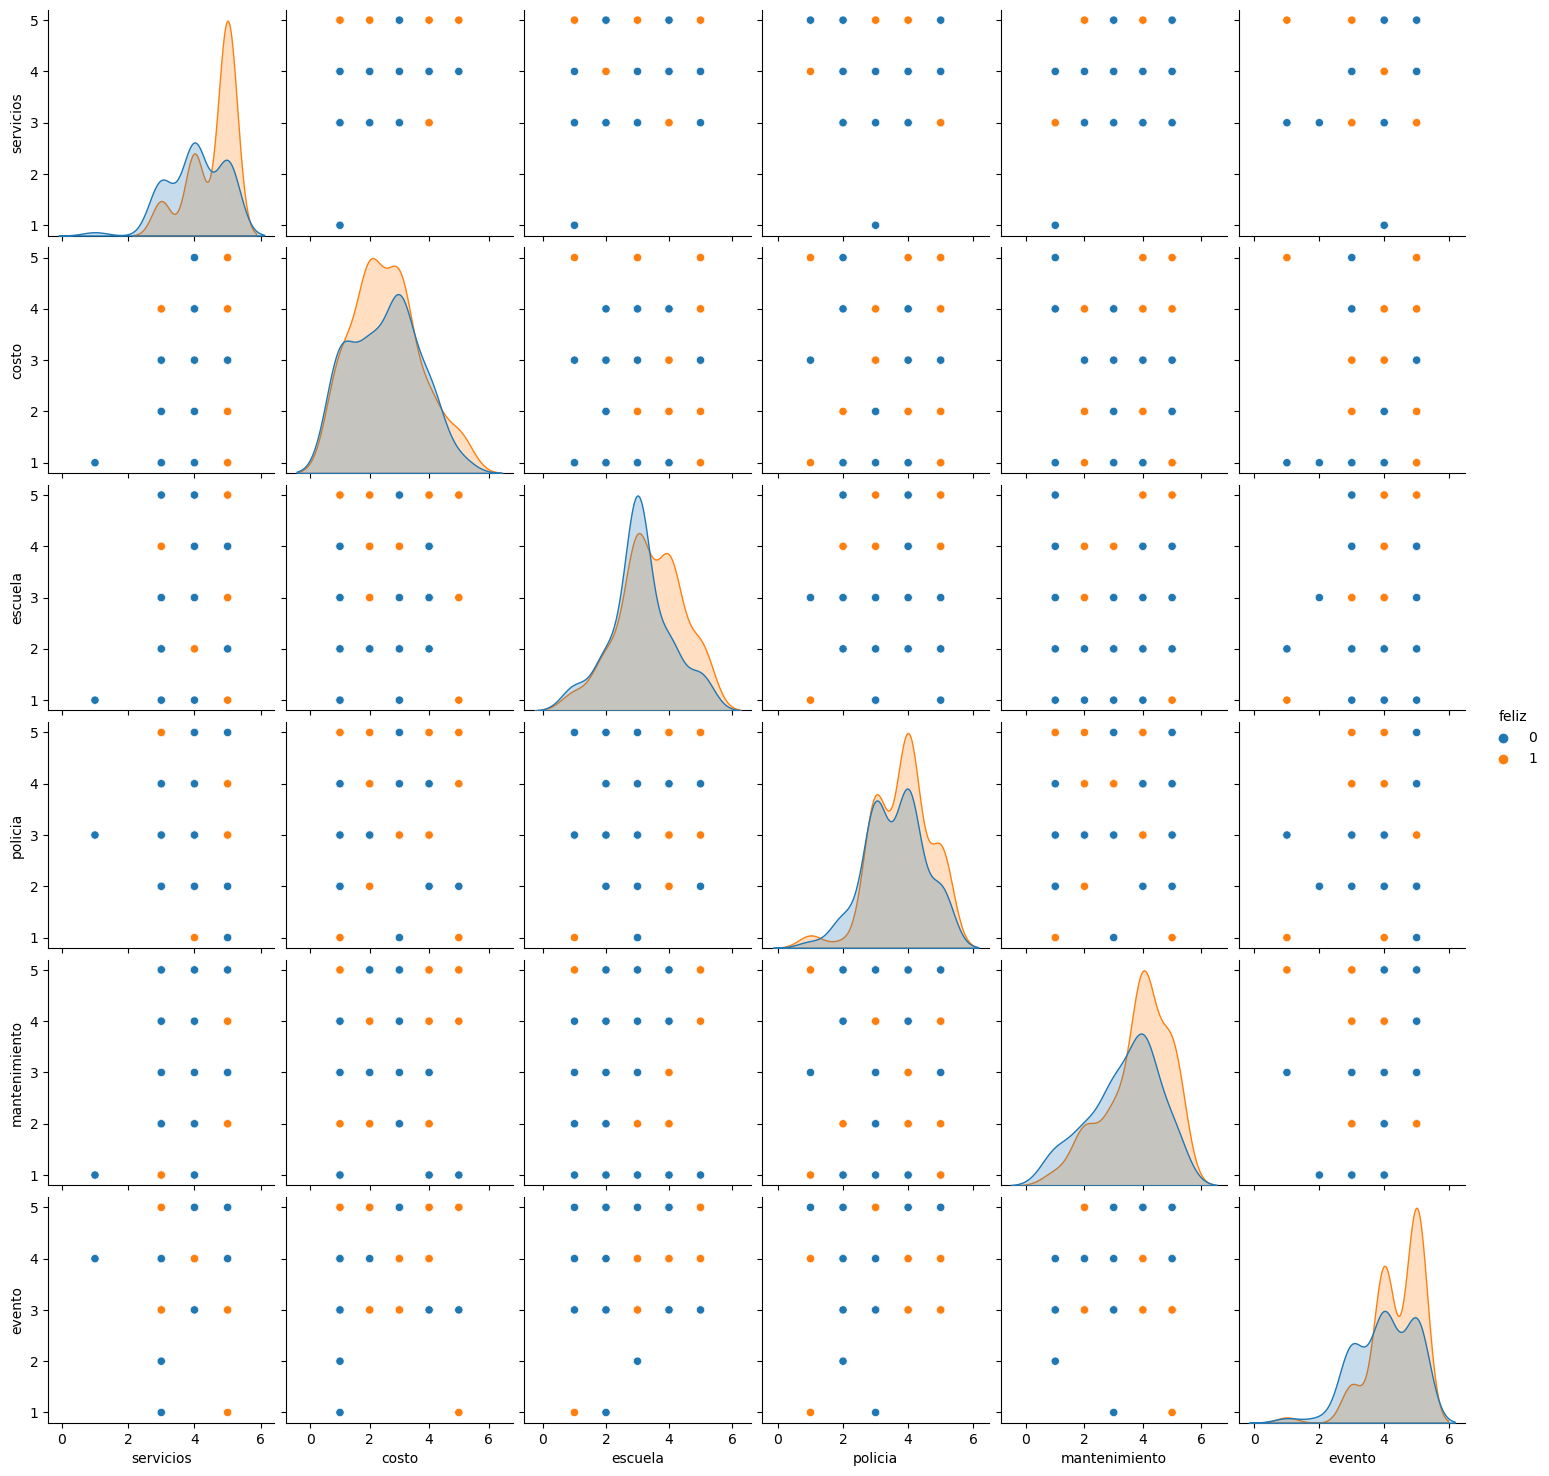

In [8]:
# Revisar las relaciones entre los datos
sns.pairplot(df, hue='feliz')

<Axes: >

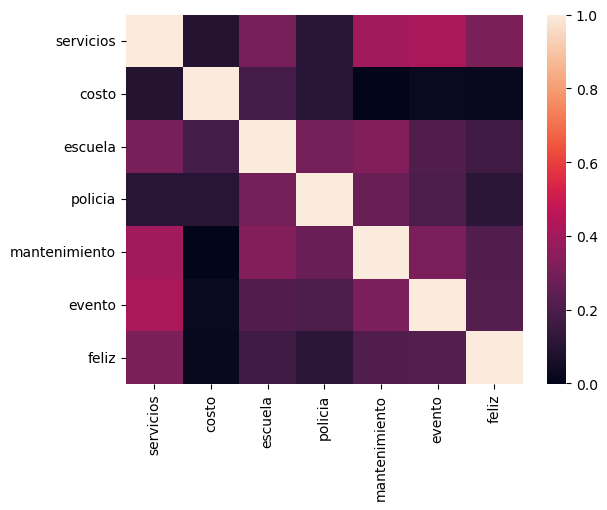

In [9]:
sns.heatmap(df.corr())

## Modelado

In [10]:
# Variables independientes
X = df[['servicios', 'costo', 'escuela', 'policia', 'mantenimiento', 'evento']]
X.head()

,servicios,costo,escuela,policia,mantenimiento,evento
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [11]:
# Variable dependiente
y = df['feliz']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: feliz, dtype: int64

In [12]:
print('X:', len(X), 'y:', len(y))

X: 143 y: 143


In [ ]:
# Entrenamiento
## Escribe tu código aqui

C:\Users\csameshima\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=10)

In [ ]:
# Resultados
## Escribe tu código aqui

array([[4.53488372, 2.41860465, 3.60465116, 3.93023256, 4.34883721,
        4.44186047],
       [3.98245614, 2.71929825, 2.75438596, 3.35087719, 2.50877193,
        3.87719298]])

In [ ]:
## Escribe tu código aqui

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

## Evaluacion

In [16]:
print(confusion_matrix(y, model.labels_))

[[33 33]
 [53 24]]


In [17]:
print(classification_report(y,model.labels_))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        66
           1       0.42      0.31      0.36        77

    accuracy                           0.40       143
   macro avg       0.40      0.41      0.40       143
weighted avg       0.40      0.40      0.39       143

